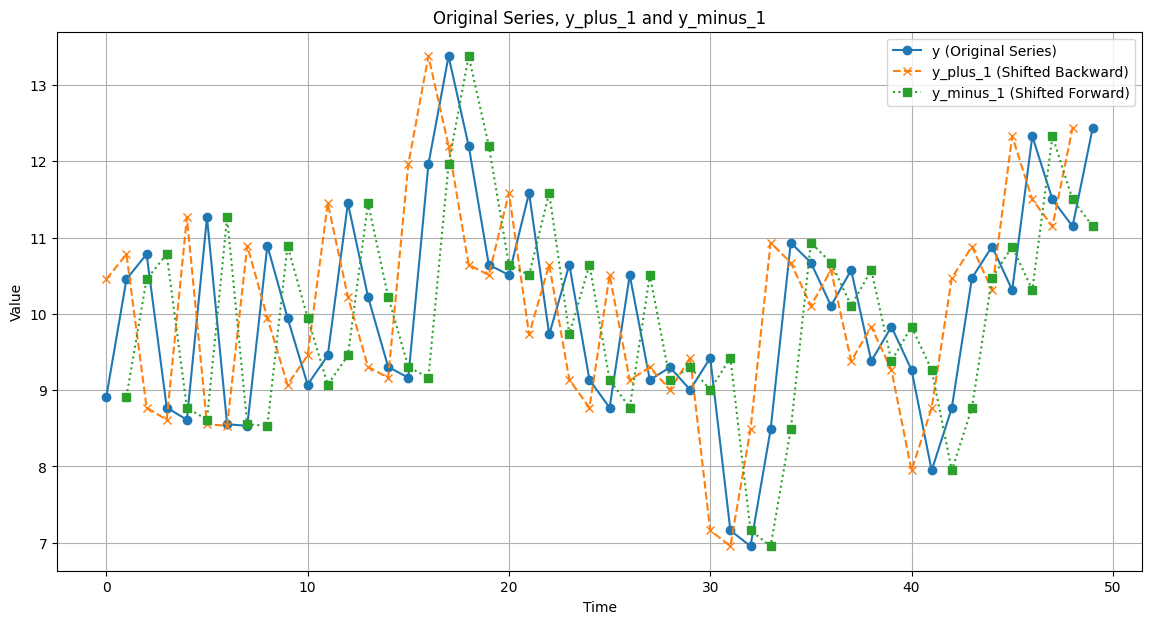

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm

# Generate synthetic AR(p) series
np.random.seed(123)
ar_params = np.array([1, -0.5, 0.25])
ma_params = np.array([1])
ar_process = ArmaProcess(ar_params, ma_params)
synthetic_ar_data = ar_process.generate_sample(nsample=50)
synthetic_ar_series = pd.Series(synthetic_ar_data)
synthetic_ar_series = synthetic_ar_series + 10

# Create y, y_plus_1, and y_minus_1
y = synthetic_ar_series
y_plus_1 = y.shift(-1)
y_minus_1 = y.shift(1)

# Plot the series
plt.figure(figsize=(14, 7))

plt.plot(y, label='y (Original Series)', marker='o')
plt.plot(y_plus_1, label='y_plus_1 (Shifted Backward)', linestyle='--', marker='x')
plt.plot(y_minus_1, label='y_minus_1 (Shifted Forward)', linestyle=':', marker='s')

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Original Series, y_plus_1 and y_minus_1')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
display(pd.DataFrame({'y_plus_1': y_plus_1,
                     'y': y,
                     'y_minus_1': y_minus_1
                     }))

,y_plus_1,y,y_minus_1
0,10.454530,8.914369,NaN
1,10.781651,10.454530,8.914369
2,8.770898,10.781651,10.454530
3,8.611436,8.770898,10.781651
4,11.264430,8.611436,8.770898
5,8.552677,11.264430,8.611436
6,8.531318,8.552677,11.264430
7,10.893426,8.531318,8.552677
8,9.947143,10.893426,8.531318
9,9.071329,9.947143,10.893426


In [18]:
# Prepare data for linear regression (drop NaN values due to shifting)
df = pd.DataFrame({'y': y, 
                   'y_minus_1': y_minus_1, 
                   'y_plus_1': y_plus_1
                   }).dropna()

# Perform linear regression
X = df[['y_minus_1', 'y_plus_1']]
X = sm.add_constant(X)
model = sm.OLS(df['y'], X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     14.88
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.10e-05
Time:                        12:25:51   Log-Likelihood:                -68.866
No. Observations:                  48   AIC:                             143.7
Df Residuals:                      45   BIC:                             149.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7752      1.513      1.173      0.2

In [19]:
print(results.params)

const        1.775194
y_minus_1    0.405147
y_plus_1     0.417163
dtype: float64


In [20]:
print(results.params)
phi_0 = results.params['const']
phi_1 = results.params['y_minus_1']
alfa_1 = results.params['y_plus_1']
print(f'\nphi_0: {phi_0:.7}\nphi_1: {phi_1:.7}\nalfa_1: {alfa_1:.7}')

const        1.775194
y_minus_1    0.405147
y_plus_1     0.417163
dtype: float64

phi_0: 1.775194
phi_1: 0.4051471
alfa_1: 0.417163


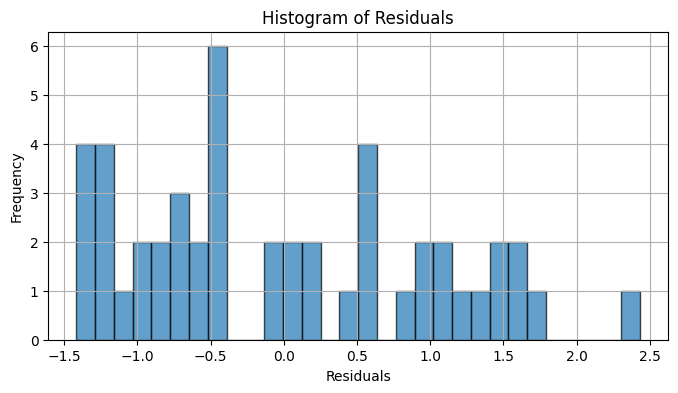

In [21]:
import matplotlib.pyplot as plt

# Assuming results is already defined and contains the residuals
residuals = results.resid

# Plotting the histogram of residuals
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
# Perform linear regression
X_2 = df[['y_minus_1']]
X_2 = sm.add_constant(X_2)
model_2 = sm.OLS(df['y'], X_2)
results_2 = model_2.fit()

# Print the regression results
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     12.64
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           0.000888
Time:                        12:25:52   Log-Likelihood:                -75.223
No. Observations:                  48   AIC:                             154.4
Df Residuals:                      46   BIC:                             158.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3603      1.311      4.088      0.0

In [23]:
print(results_2.params)
theta_0 = results_2.params['const']
theta_1 = results_2.params['y_minus_1']
print(f'\ntheta_0: {theta_0:.7}\ntheta_1: {theta_1:.7}')

const        5.360271
y_minus_1    0.465137
dtype: float64

theta_0: 5.360271
theta_1: 0.4651369


In [24]:
print(phi_0 / (1 - (2*alfa_1)))
print(theta_0)
print((phi_1 - alfa_1) / (1 - (2*alfa_1)))
print(theta_1)

10.714985104387742
5.360271259298518
-0.07252777011927879
0.46513692302805476


In [31]:
# y_hat_2 = (phi_0 / (1 - (2*alfa_1))) + ((phi_1 - alfa_1) / (1 - (2*alfa_1)))*y_minus_1) + (results.resid / (1 - (2*alfa_1)))

y_rebuild = phi_0 + (phi_1 * y_minus_1) + (alfa_1 * y_plus_1) + results.resid

y_btf = results.predict(X)

t_1 = phi_0 / (1 - (2*alfa_1))
t_2 = (phi_1 - alfa_1) / (1 - (2*alfa_1))
t_3 = 1 - (2*alfa_1)

# y_hat_2 = t_1 + (t_2 * y_minus_1) + (results.resid / t_3)
y_ar_1 = t_1 + (t_2 * y_minus_1) + results.resid

In [32]:
# + (results.resid / (1 - (2*alfa_1)))

In [33]:
display(pd.DataFrame({'y_hat': y_hat, 
                   'y_hat_2': y_hat_2,
                   'y': y
                   }))

,y_hat,y_hat_2,y
0,NaN,NaN,8.914369
1,9.884531,10.638445,10.454530
2,9.669711,11.068682,10.781651
3,9.735721,8.968193,8.770898
4,10.027801,8.662486,8.611436
5,8.831952,12.522894,11.264430
6,9.897895,8.552783,8.552677
7,9.784620,8.841376,8.531318
8,9.381213,11.608441,10.893426
9,9.972857,9.899196,9.947143


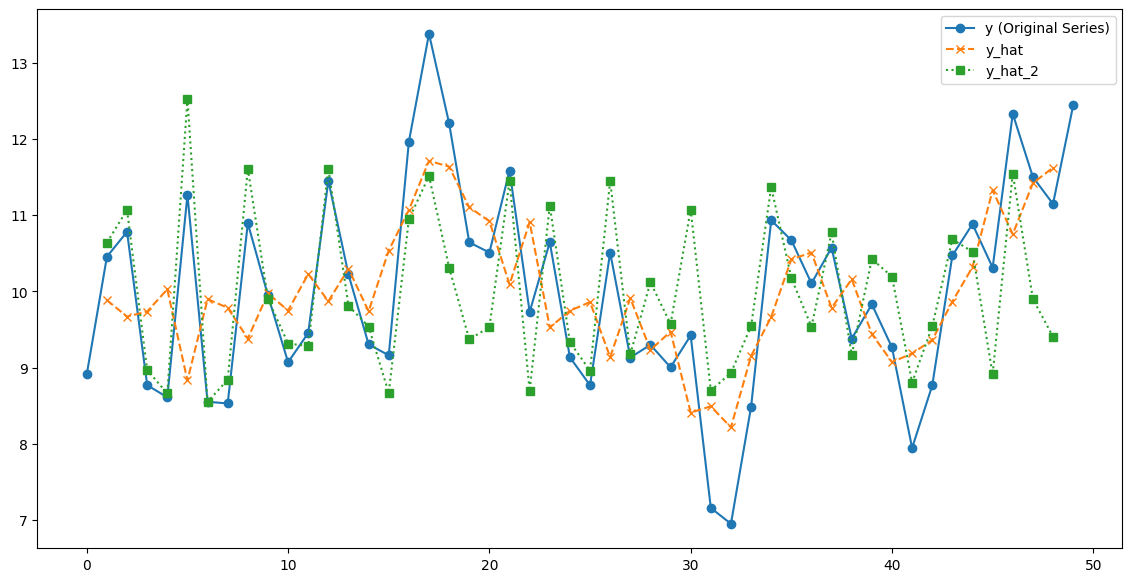

In [34]:
# Plot the series
plt.figure(figsize=(14, 7))

plt.plot(y, label='y (Original Series)', marker='o')
plt.plot(y_hat, label='y_hat', linestyle='--', marker='x')
plt.plot(y_hat_2, label='y_hat_2', linestyle=':', marker='s')

plt.legend()